<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Google-Colaboratory-en-Ciencias-Economicas/blob/master/Analisis_exploratorio_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos

## Carga de librerias
Se utilizan las librerias: pandas para cálculos con dataframe, datareader para obtener datos de fuente externa, datetime para trabajar con las fechas, matplotlib para los primeros gráficos y numpy para cálculos matemáticos más avanzados.

In [0]:
import pandas as pd
import pandas_datareader as data
import datetime as dt
import matplotlib.pyplot as plot
import numpy as np

## Obtencion de los datos por ejercicios 
Se crean conjuntos de datos denominados BTC por Bitcoin para cada uno de los ejercicios, obteniendo los datos desde yahoo finanzas. En este caso se decide trabajar por año para el mismo activo digital, pero podría haber sido tambien comparar diferentes criptodivisas, ya que de la visualización de las gráficas se puede constatar que presentan el mismo comportamiento.

In [0]:
BTC2017 = data.DataReader("BTC-USD", start='2017-01-01', end='2017-12-31', data_source='yahoo')
BTC2018 = data.DataReader("BTC-USD", start='2018-01-01', end='2018-12-31', data_source='yahoo')
BTC2019 = data.DataReader("BTC-USD", start='2019-01-01', end='2019-12-31', data_source='yahoo')

## Creando dataframe y realizando limpieza y transformacion de los datos

### Dataframe por cada uno de los años

In [0]:
BITCOIN2017 = pd.DataFrame(BTC2017)
BITCOIN2018 = pd.DataFrame(BTC2018)
BITCOIN2019 = pd.DataFrame(BTC2019)

Se consulta la cantidad de filas y columnas por cada dataset correspondiente a cada año

In [27]:
BITCOIN2017.shape

(366, 6)

In [28]:
BITCOIN2018.shape

(366, 6)

In [29]:
BITCOIN2019.shape

(366, 6)

Ahora vamos a visualizar uno de los datasets creados, el correspondiente al ejercicio 2019, en el cual ya se sabe por el comando shape que contiene 366 filas y 6 columnas.

In [30]:
print(BITCOIN2019)

                   High          Low  ...       Volume    Adj Close
Date                                  ...                          
2019-01-01  3850.913818  3707.231201  ...   4324200990  3843.520020
2019-01-02  3947.981201  3817.409424  ...   5244856835  3943.409424
2019-01-03  3935.685059  3826.222900  ...   4530215218  3836.741211
2019-01-04  3865.934570  3783.853760  ...   4847965467  3857.717529
2019-01-05  3904.903076  3836.900146  ...   5137609823  3845.194580
...                 ...          ...  ...          ...          ...
2019-12-28  7399.041016  7286.905273  ...  21365673026  7317.990234
2019-12-29  7513.948242  7279.865234  ...  22445257701  7422.652832
2019-12-30  7454.824219  7276.308105  ...  22874131671  7292.995117
2019-12-31  7335.290039  7169.777832  ...  21167946112  7193.599121
2020-01-01  7254.330566  7174.944336  ...  18565664996  7200.174316

[366 rows x 6 columns]


Se puede observar que los nombres de las distintas filas fueron consignados con la fecha de cada uno de los registros de cotización del Bitcoin, se procede a continuación a crear la columna Date, renombrar los nombres de las filas, y crear la variable Day con el nombre del día tomando ese dato desde la columna Date.

### Transformando datos del dataset

In [0]:
DATE2017 = BITCOIN2017.index.values
DATE2018 = BITCOIN2018.index.values
DATE2019 = BITCOIN2019.index.values

De esta forma se genera la variable "Date" por cada año, tomando el valor del index (nombre de las filas) para luego volcar esos valores a una nueva columna

In [0]:
BITCOIN2017.insert(0, column='Date', value=DATE2017)
BITCOIN2018.insert(0, column='Date', value=DATE2018)
BITCOIN2019.insert(0, column='Date', value=DATE2019)

Con el codigo se agrega la columna Date en primera posición tomando los valores de las variables creadas anteriormente, para cada dataset de cada año analizado. A continuación visualizamos el dataset del año 2019 para ver como esta quedando.

In [33]:
print(BITCOIN2019)

                 Date         High  ...       Volume    Adj Close
Date                                ...                          
2019-01-01 2019-01-01  3850.913818  ...   4324200990  3843.520020
2019-01-02 2019-01-02  3947.981201  ...   5244856835  3943.409424
2019-01-03 2019-01-03  3935.685059  ...   4530215218  3836.741211
2019-01-04 2019-01-04  3865.934570  ...   4847965467  3857.717529
2019-01-05 2019-01-05  3904.903076  ...   5137609823  3845.194580
...               ...          ...  ...          ...          ...
2019-12-28 2019-12-28  7399.041016  ...  21365673026  7317.990234
2019-12-29 2019-12-29  7513.948242  ...  22445257701  7422.652832
2019-12-30 2019-12-30  7454.824219  ...  22874131671  7292.995117
2019-12-31 2019-12-31  7335.290039  ...  21167946112  7193.599121
2020-01-01 2020-01-01  7254.330566  ...  18565664996  7200.174316

[366 rows x 7 columns]


Ahora tenemos siete columnas, porque se agregó la columna Date, pero se debe cambiar el nombre a las filas, lo que se hace de la siguiente forma:

In [0]:
BITCOIN2017.reset_index(drop=True, inplace=True)
BITCOIN2018.reset_index(drop=True, inplace=True)
BITCOIN2019.reset_index(drop=True, inplace=True)

Y el dataframe presenta ahora el siguiente aspecto:

In [35]:
print(BITCOIN2019)

          Date         High          Low  ...        Close       Volume    Adj Close
0   2019-01-01  3850.913818  3707.231201  ...  3843.520020   4324200990  3843.520020
1   2019-01-02  3947.981201  3817.409424  ...  3943.409424   5244856835  3943.409424
2   2019-01-03  3935.685059  3826.222900  ...  3836.741211   4530215218  3836.741211
3   2019-01-04  3865.934570  3783.853760  ...  3857.717529   4847965467  3857.717529
4   2019-01-05  3904.903076  3836.900146  ...  3845.194580   5137609823  3845.194580
..         ...          ...          ...  ...          ...          ...          ...
361 2019-12-28  7399.041016  7286.905273  ...  7317.990234  21365673026  7317.990234
362 2019-12-29  7513.948242  7279.865234  ...  7422.652832  22445257701  7422.652832
363 2019-12-30  7454.824219  7276.308105  ...  7292.995117  22874131671  7292.995117
364 2019-12-31  7335.290039  7169.777832  ...  7193.599121  21167946112  7193.599121
365 2020-01-01  7254.330566  7174.944336  ...  7200.174316  18565

### Creando datos para los diferentes datasets

In [0]:
BITCOIN2017['Day']=pd.DatetimeIndex(BITCOIN2017['Date']).day_name()
BITCOIN2018['Day']=pd.DatetimeIndex(BITCOIN2018['Date']).day_name()
BITCOIN2019['Day']=pd.DatetimeIndex(BITCOIN2019['Date']).day_name()

In [37]:
print(BITCOIN2019)

          Date         High          Low  ...       Volume    Adj Close        Day
0   2019-01-01  3850.913818  3707.231201  ...   4324200990  3843.520020    Tuesday
1   2019-01-02  3947.981201  3817.409424  ...   5244856835  3943.409424  Wednesday
2   2019-01-03  3935.685059  3826.222900  ...   4530215218  3836.741211   Thursday
3   2019-01-04  3865.934570  3783.853760  ...   4847965467  3857.717529     Friday
4   2019-01-05  3904.903076  3836.900146  ...   5137609823  3845.194580   Saturday
..         ...          ...          ...  ...          ...          ...        ...
361 2019-12-28  7399.041016  7286.905273  ...  21365673026  7317.990234   Saturday
362 2019-12-29  7513.948242  7279.865234  ...  22445257701  7422.652832     Sunday
363 2019-12-30  7454.824219  7276.308105  ...  22874131671  7292.995117     Monday
364 2019-12-31  7335.290039  7169.777832  ...  21167946112  7193.599121    Tuesday
365 2020-01-01  7254.330566  7174.944336  ...  18565664996  7200.174316  Wednesday

[36

Ahora tenemos 8 columnas en cada uno de los datasets porque tenemos la columna Day con el nombre del día correspondiente a la fecha de cotización registrada del Bitcoin.

### Cambiando el nombre de una columna de cada uno de los Datasets
Ese cambio es necesario, porque algunos parámetros de algoritmos que se utilizarán no aceptan nonmbres de columnas de dos palabras, por eso se utiliza un guión bajo.

In [0]:
BITCOIN2017.rename(columns={'Adj Close':'Adj_Close'}, inplace=True)
BITCOIN2018.rename(columns={'Adj Close':'Adj_Close'}, inplace=True)
BITCOIN2019.rename(columns={'Adj Close':'Adj_Close'}, inplace=True)

In [39]:
print(BITCOIN2019)

          Date         High          Low  ...       Volume    Adj_Close        Day
0   2019-01-01  3850.913818  3707.231201  ...   4324200990  3843.520020    Tuesday
1   2019-01-02  3947.981201  3817.409424  ...   5244856835  3943.409424  Wednesday
2   2019-01-03  3935.685059  3826.222900  ...   4530215218  3836.741211   Thursday
3   2019-01-04  3865.934570  3783.853760  ...   4847965467  3857.717529     Friday
4   2019-01-05  3904.903076  3836.900146  ...   5137609823  3845.194580   Saturday
..         ...          ...          ...  ...          ...          ...        ...
361 2019-12-28  7399.041016  7286.905273  ...  21365673026  7317.990234   Saturday
362 2019-12-29  7513.948242  7279.865234  ...  22445257701  7422.652832     Sunday
363 2019-12-30  7454.824219  7276.308105  ...  22874131671  7292.995117     Monday
364 2019-12-31  7335.290039  7169.777832  ...  21167946112  7193.599121    Tuesday
365 2020-01-01  7254.330566  7174.944336  ...  18565664996  7200.174316  Wednesday

[36

### Creando la columna Returns
Se crea una columna nueva por cada datasets, con los retorno de los precios, definiendo esos retornos como el precio del dia n, menos el precio del dia n-1 tal como se visualiza en la siguiente ecuación:


In [0]:
BITCOIN2017['Return']=BITCOIN2017.Adj_Close.pct_change()
BITCOIN2018['Return']=BITCOIN2018.Adj_Close.pct_change()
BITCOIN2019['Return']=BITCOIN2019.Adj_Close.pct_change()

In [41]:
print(BITCOIN2019)

          Date         High          Low  ...    Adj_Close        Day    Return
0   2019-01-01  3850.913818  3707.231201  ...  3843.520020    Tuesday       NaN
1   2019-01-02  3947.981201  3817.409424  ...  3943.409424  Wednesday  0.025989
2   2019-01-03  3935.685059  3826.222900  ...  3836.741211   Thursday -0.027050
3   2019-01-04  3865.934570  3783.853760  ...  3857.717529     Friday  0.005467
4   2019-01-05  3904.903076  3836.900146  ...  3845.194580   Saturday -0.003246
..         ...          ...          ...  ...          ...        ...       ...
361 2019-12-28  7399.041016  7286.905273  ...  7317.990234   Saturday  0.003827
362 2019-12-29  7513.948242  7279.865234  ...  7422.652832     Sunday  0.014302
363 2019-12-30  7454.824219  7276.308105  ...  7292.995117     Monday -0.017468
364 2019-12-31  7335.290039  7169.777832  ...  7193.599121    Tuesday -0.013629
365 2020-01-01  7254.330566  7174.944336  ...  7200.174316  Wednesday  0.000914

[366 rows x 9 columns]


Ahora tenemos 9 columnas, la que se agrega es el calculo del retorno, por su forma de calcular se puede observar que para el dia inicial del dataset, posición 0, no hay un valor disponible porque no tiene el valor correspondiente al dia n-1.

# Visualizaciones

## Grafico Serie de Tiempo
Se puede constatar los estilos disponibles para los graficos

In [0]:
print(plot.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


[Text(0, 0.5, 'Retorno 2019')]

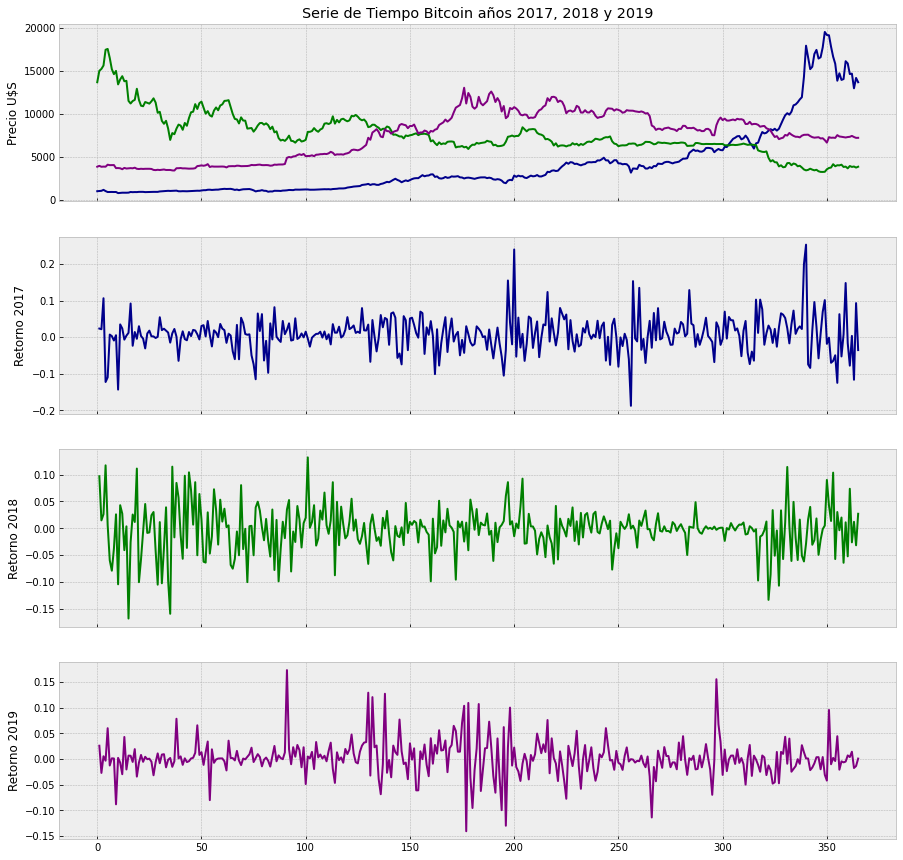

In [48]:
plot.style.use('bmh')
fix, ax = plot.subplots(4,1, figsize=(15,15), sharex=True)

BITCOIN2017.Adj_Close.plot(ax=ax[0], color=['darkblue'])
ax[0].set(title='Serie de Tiempo Bitcoin años 2017, 2018 y 2019', ylabel='Precio U$S')
BITCOIN2018.Adj_Close.plot(ax=ax[0], color=['green'])
BITCOIN2019.Adj_Close.plot(ax=ax[0], color=['purple'])


BITCOIN2017.Return.plot(ax=ax[1], color=['darkblue'])
ax[1].set(ylabel='Retorno 2017')
BITCOIN2018.Return.plot(ax=ax[2], color=['green'])
ax[2].set(ylabel='Retorno 2018')
BITCOIN2019.Return.plot(ax=ax[3], color=['purple'])
ax[3].set(ylabel='Retorno 2019')